İlave iki hafta
En yoğun ilk 5 istasyon
Bu istasyonların en yoğun gün ve saatleri
Nisan 2 
mayıs 

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [72]:

df220430=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220430.csv')
df220507=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220507.csv')
df220514=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220514.csv')
df220521=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220521.csv')
df220528=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220528.csv')
df220604=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220604.csv')
df_raw= pd.concat([df220430,df220507,df220514,df220521,df220528,df220604])
df_raw.to_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/df_raw_all.csv',index=False)

#Mayıs 23 ile haziran 11 hafatları 

In [73]:
df_raw.shape

(1267246, 11)

In [74]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267246 entries, 0 to 211608
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1267246 non-null  object
 1   UNIT                                                                  1267246 non-null  object
 2   SCP                                                                   1267246 non-null  object
 3   STATION                                                               1267246 non-null  object
 4   LINENAME                                                              1267246 non-null  object
 5   DIVISION                                                              1267246 non-null  object
 6   DATE                                                                  1267246 non-n

In [75]:
df_raw.duplicated().sum()

0

In [76]:
df_raw.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [77]:
df_raw.rename(columns={df_raw.columns[10]:'EXITS'},inplace=True)

In [78]:
df_raw.nunique()

C/A            753
UNIT           470
SCP            224
STATION        379
LINENAME       114
DIVISION         6
DATE            42
TIME         37593
DESC             2
ENTRIES     949150
EXITS       921105
dtype: int64

In [79]:
df_raw

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,00:00:00,REGULAR,7703737,2695797
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,04:00:00,REGULAR,7703739,2695803
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,08:00:00,REGULAR,7703749,2695831
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,12:00:00,REGULAR,7703774,2695912
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/23/2022,16:00:00,REGULAR,7703824,2695965
...,...,...,...,...,...,...,...,...,...,...,...
211604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433
211605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433
211606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433
211607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435


In [80]:
df_raw['TURNSTILE']=df_raw['C/A']+' '+df_raw['UNIT']+' '+df_raw['SCP']
df_raw['DATETIME']=df_raw['DATE']+' '+df_raw['TIME']

In [81]:
df_raw.sort_values(by=["TURNSTILE",'DATETIME'],inplace=True) 

In [82]:
df_raw['DATE']=pd.to_datetime(df_raw['DATE'].astype(str), format='%m/%d/%Y') #chaging date format, define date format via format=''

In [83]:
df_raw.drop(columns='C/A',axis=1,inplace=True)
df_raw.drop(columns='UNIT',axis=1,inplace=True)
df_raw.drop(columns='SCP',axis=1,inplace=True)
df_raw.drop(columns='DATETIME',axis=1,inplace=True)

In [84]:
df_raw['DAYOFWEEK'] = df_raw['DATE'].dt.day_name() # getting day name of date

In [85]:
df_raw

,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DAYOFWEEK
0,59 ST,NQR456W,BMT,2022-04-23,00:00:00,REGULAR,7703737,2695797,A002 R051 02-00-00,Saturday
1,59 ST,NQR456W,BMT,2022-04-23,04:00:00,REGULAR,7703739,2695803,A002 R051 02-00-00,Saturday
2,59 ST,NQR456W,BMT,2022-04-23,08:00:00,REGULAR,7703749,2695831,A002 R051 02-00-00,Saturday
3,59 ST,NQR456W,BMT,2022-04-23,12:00:00,REGULAR,7703774,2695912,A002 R051 02-00-00,Saturday
4,59 ST,NQR456W,BMT,2022-04-23,16:00:00,REGULAR,7703824,2695965,A002 R051 02-00-00,Saturday
...,...,...,...,...,...,...,...,...,...,...
211604,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,REGULAR,0,433,TRAM2 R469 00-05-01,Friday
211605,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,REGULAR,0,433,TRAM2 R469 00-05-01,Friday
211606,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,REGULAR,0,433,TRAM2 R469 00-05-01,Friday
211607,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,REGULAR,0,435,TRAM2 R469 00-05-01,Friday


In [86]:
df_raw.DESC.value_counts()

REGULAR       1262200
RECOVR AUD       5046
Name: DESC, dtype: int64

In [87]:
df_raw=df_raw[df_raw['DESC']=='REGULAR'] # "RECOVR AUD" attributes has dropped. Rows' DESC is only REGULAR type.

In [88]:
df_raw.drop(columns='DESC',axis=1,inplace=True)

C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\3828759546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop(columns='DESC',axis=1,inplace=True)


In [89]:
df_raw.head()

,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,TURNSTILE,DAYOFWEEK
0,59 ST,NQR456W,BMT,2022-04-23,00:00:00,7703737,2695797,A002 R051 02-00-00,Saturday
1,59 ST,NQR456W,BMT,2022-04-23,04:00:00,7703739,2695803,A002 R051 02-00-00,Saturday
2,59 ST,NQR456W,BMT,2022-04-23,08:00:00,7703749,2695831,A002 R051 02-00-00,Saturday
3,59 ST,NQR456W,BMT,2022-04-23,12:00:00,7703774,2695912,A002 R051 02-00-00,Saturday
4,59 ST,NQR456W,BMT,2022-04-23,16:00:00,7703824,2695965,A002 R051 02-00-00,Saturday


In [90]:
df_raw['DIFF.ENTRIES']=df_raw['ENTRIES'].diff()
df_raw['DIFF.EXITS']=df_raw['EXITS'].diff()
df_raw.drop(columns='ENTRIES',axis=1,inplace=True)
df_raw.drop(columns='EXITS',axis=1,inplace=True)

C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\2615660028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['DIFF.ENTRIES']=df_raw['ENTRIES'].diff()
C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\2615660028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['DIFF.EXITS']=df_raw['EXITS'].diff()
C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\2615660028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [91]:
df_raw

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
0,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-00-00,Saturday,NaN,NaN
1,59 ST,NQR456W,BMT,2022-04-23,04:00:00,A002 R051 02-00-00,Saturday,2.0,6.0
2,59 ST,NQR456W,BMT,2022-04-23,08:00:00,A002 R051 02-00-00,Saturday,10.0,28.0
3,59 ST,NQR456W,BMT,2022-04-23,12:00:00,A002 R051 02-00-00,Saturday,25.0,81.0
4,59 ST,NQR456W,BMT,2022-04-23,16:00:00,A002 R051 02-00-00,Saturday,50.0,53.0
...,...,...,...,...,...,...,...,...,...
211604,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
211605,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
211606,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
211607,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,2.0


In [92]:
df_raw.drop(index=0, inplace=True) # The row has "NaN" has been dropped.

C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\1090700148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop(index=0, inplace=True) # The row has "NaN" has been dropped.


In [93]:
df_raw.head()

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
1,59 ST,NQR456W,BMT,2022-04-23,04:00:00,A002 R051 02-00-00,Saturday,2.0,6.0
2,59 ST,NQR456W,BMT,2022-04-23,08:00:00,A002 R051 02-00-00,Saturday,10.0,28.0
3,59 ST,NQR456W,BMT,2022-04-23,12:00:00,A002 R051 02-00-00,Saturday,25.0,81.0
4,59 ST,NQR456W,BMT,2022-04-23,16:00:00,A002 R051 02-00-00,Saturday,50.0,53.0
5,59 ST,NQR456W,BMT,2022-04-23,20:00:00,A002 R051 02-00-00,Saturday,57.0,46.0


##### There are three problems regarding the values in "DIFF.ENTRIES","DIFF.EXITS,"TRAFFIC" columns.
    - positive too much values
    - negative values 
    - some zero values  
    
If a passanger passes a turstile in 3 second, max. 4800 passangers can pass a turstile in 4-hours.

In [94]:
df_raw[ (df_raw['DIFF.ENTRIES'] < 0) | (df_raw['DIFF.EXITS'] < 0)] # negative values

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
42,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-00-01,Saturday,-900428.0,-1122145.0
84,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-00,Saturday,-5336974.0,4131463.0
126,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-01,Saturday,256602.0,-2955145.0
168,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-02,Saturday,-1612604.0,-2609394.0
252,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-04,Saturday,1381644.0,-3186770.0
...,...,...,...,...,...,...,...,...,...
210924,RIT-MANHATTAN,R,RIT,2022-04-23,01:00:00,TRAM1 R468 00-00-02,Saturday,-329543.0,129870.0
210966,RIT-MANHATTAN,R,RIT,2022-04-23,01:00:00,TRAM1 R468 00-05-00,Saturday,-445196.0,-142738.0
211094,RIT-ROOSEVELT,R,RIT,2022-04-23,01:00:00,TRAM2 R469 00-03-00,Saturday,-3296028.0,-26434.0
211180,RIT-ROOSEVELT,R,RIT,2022-04-23,01:00:00,TRAM2 R469 00-05-00,Saturday,-2879295.0,-402336.0


In [95]:
df_raw[ (df_raw['DIFF.ENTRIES'] > 4800) | (df_raw['DIFF.EXITS'] > 4800)] # too much number of passangers

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
84,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-00,Saturday,-5336974.0,4131463.0
126,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-01,Saturday,256602.0,-2955145.0
210,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-03,Saturday,6094339.0,6872376.0
252,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-04,Saturday,1381644.0,-3186770.0
294,59 ST,NQR456W,BMT,2022-04-23,00:00:00,A002 R051 02-03-05,Saturday,4694096.0,-2516857.0
...,...,...,...,...,...,...,...,...,...
210840,RIT-MANHATTAN,R,RIT,2022-04-23,01:00:00,TRAM1 R468 00-00-00,Saturday,1357700.0,30358.0
210924,RIT-MANHATTAN,R,RIT,2022-04-23,01:00:00,TRAM1 R468 00-00-02,Saturday,-329543.0,129870.0
211008,RIT-ROOSEVELT,R,RIT,2022-04-23,01:00:00,TRAM2 R469 00-00-00,Saturday,1128897.0,28999.0
211051,RIT-ROOSEVELT,R,RIT,2022-04-23,01:00:00,TRAM2 R469 00-00-01,Saturday,2858468.0,28145.0


In [96]:
df=df_raw[((df_raw['DIFF.ENTRIES']>=0) & (df_raw['DIFF.EXITS']>=0)) & ((df_raw['DIFF.ENTRIES']<=4880) & (df_raw['DIFF.EXITS']<=4880))]
print("Raw Data Rows:",df_raw.shape[0])
print("Extracted Data Rows:",df.shape[0])
print("Eliminated Data Rows:",df_raw.shape[0]-df.shape[0])
print("Elimineted Rows (%):",(100-(df.shape[0]/df_raw.shape[0]*100)))

Raw Data Rows: 1262194
Extracted Data Rows: 1241664
Eliminated Data Rows: 20530
Elimineted Rows (%): 1.6265328467731592


In [97]:
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df 

C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\759746642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='index',inplace=True)


,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS
0,59 ST,NQR456W,BMT,2022-04-23,04:00:00,A002 R051 02-00-00,Saturday,2.0,6.0
1,59 ST,NQR456W,BMT,2022-04-23,08:00:00,A002 R051 02-00-00,Saturday,10.0,28.0
2,59 ST,NQR456W,BMT,2022-04-23,12:00:00,A002 R051 02-00-00,Saturday,25.0,81.0
3,59 ST,NQR456W,BMT,2022-04-23,16:00:00,A002 R051 02-00-00,Saturday,50.0,53.0
4,59 ST,NQR456W,BMT,2022-04-23,20:00:00,A002 R051 02-00-00,Saturday,57.0,46.0
...,...,...,...,...,...,...,...,...,...
1241659,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1241660,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1241661,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1241662,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,2.0


In [98]:
df['TRAFFIC']=df['DIFF.ENTRIES']+df['DIFF.EXITS']

C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\3289938883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRAFFIC']=df['DIFF.ENTRIES']+df['DIFF.EXITS']


In [105]:
df

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAYOFWEEK,DIFF.ENTRIES,DIFF.EXITS,TRAFFIC
0,59 ST,NQR456W,BMT,2022-04-23,04:00:00,A002 R051 02-00-00,Saturday,2.0,6.0,8.0
1,59 ST,NQR456W,BMT,2022-04-23,08:00:00,A002 R051 02-00-00,Saturday,10.0,28.0,38.0
2,59 ST,NQR456W,BMT,2022-04-23,12:00:00,A002 R051 02-00-00,Saturday,25.0,81.0,106.0
3,59 ST,NQR456W,BMT,2022-04-23,16:00:00,A002 R051 02-00-00,Saturday,50.0,53.0,103.0
4,59 ST,NQR456W,BMT,2022-04-23,20:00:00,A002 R051 02-00-00,Saturday,57.0,46.0,103.0
...,...,...,...,...,...,...,...,...,...,...
1241659,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0,0.0
1241660,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0,0.0
1241661,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0,0.0
1241662,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,2.0,2.0


In [124]:
print(division.sort_values(by=['TRAFFIC'],ascending=False)[0:7],"\n")
print(linename.sort_values(by=['TRAFFIC'],ascending=False)[0:7],"\n")
print(station.sort_values(by=['TRAFFIC'],ascending=False)[0:7],"\n")
print(weekday.sort_values(by=['TRAFFIC'],ascending=False)[0:7],"\n")
print(time.sort_values(by=['TRAFFIC'],ascending=False)[0:7])

  DIVISION  DIFF.ENTRIES  DIFF.EXITS     TRAFFIC
2      IRT    34174488.0  46327266.0  80501754.0
1      IND    29882696.0  39270219.0  69152915.0
0      BMT    18249121.0  24446417.0  42695538.0
3      PTH     4953227.0   5496438.0  10449665.0
4      RIT      285357.0      6409.0    291766.0
5      SRT      185386.0        29.0    185415.0 

   LINENAME  DIFF.ENTRIES  DIFF.EXITS     TRAFFIC
0         1     9969622.0  11748176.0  21717798.0
30        6     5015399.0   7539710.0  12555109.0
32        7     4961618.0   6624541.0  11586159.0
81        F     2682260.0   3221283.0   5903543.0
18       25     2953876.0   2650429.0   5604305.0
95        L     1982211.0   3359116.0   5341327.0
1       123     1785562.0   3014234.0   4799796.0 

             STATION  DIFF.ENTRIES  DIFF.EXITS    TRAFFIC
61    34 ST-PENN STA     2054234.0   3259264.0  5313498.0
233  GRD CNTRL-42 ST     1646269.0   2755711.0  4401980.0
59   34 ST-HERALD SQ     1534369.0   2518976.0  4053345.0
14    14 ST-UNION SQ 

In [125]:
division=df.groupby(by='DIVISION')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
linename=df.groupby(by='LINENAME')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
station=df.groupby(by='STATION')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
weekday=df.groupby(by='DAYOFWEEK')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
time=df.groupby(by='TIME')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()

division.sort_values(by='TRAFFIC',ascending=False,inplace=True)
linename.sort_values(by='TRAFFIC',ascending=False,inplace=True)
station.sort_values(by='TRAFFIC',ascending=False,inplace=True)
weekday.sort_values(by='TRAFFIC',ascending=False,inplace=True)
time.sort_values(by='TRAFFIC',ascending=False,inplace=True)


division.reset_index(inplace=True)
linename.reset_index(inplace=True)
station.reset_index(inplace=True)
weekday.reset_index(inplace=True)
time.reset_index(inplace=True)

C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\2599522224.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  division=df.groupby(by='DIVISION')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\2599522224.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  linename=df.groupby(by='LINENAME')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\2599522224.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  station=df.groupby(by='STATION')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
C:\Users\mehmet\AppData\Local\Temp\ipykernel_9460\2599522224.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a li

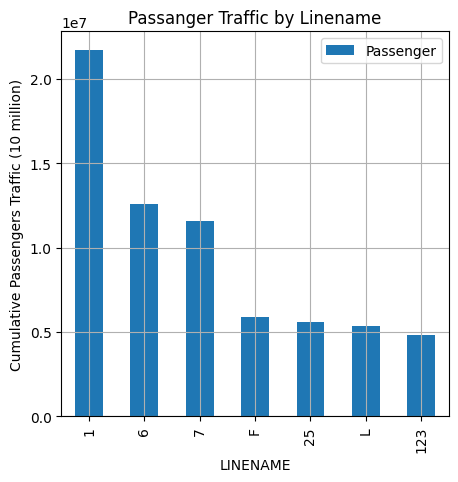

In [159]:
linename[0:7].plot(kind="bar",
              x="LINENAME",y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (10 million)',
              grid=True,
              yticks=np.arange(0,23096227,5000000),
              title='Passanger Traffic by Linename',
              figsize=(5,5))
plt.show()

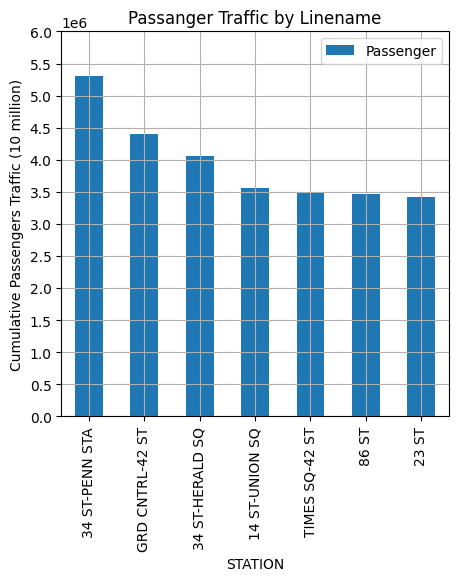

In [168]:
station[0:7].plot(kind="bar",
              x="STATION",y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (10 million)',
              grid=True,
              yticks=np.arange(0,6096227,500000),
              title='Passanger Traffic by Station',
              figsize=(5,5))
plt.show()

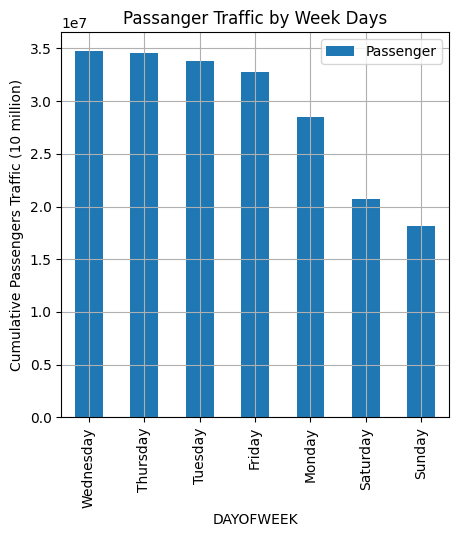

In [127]:
weekday.plot(kind="bar",
              x="DAYOFWEEK",y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (10 million)',
              grid=True,
              yticks=np.arange(0,39096227,5000000),
              title='Passanger Traffic by Week Days',
              figsize=(5,5))
plt.show()

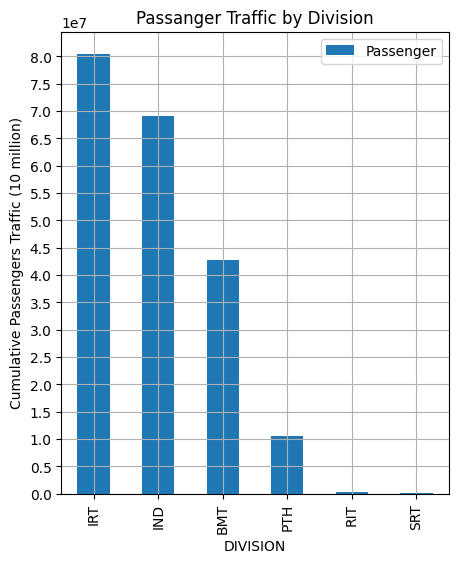

In [128]:
division.plot(kind="bar",
              x='DIVISION',y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (10 million)',
              grid=True,
              yticks=np.arange(0,85000000,5000000),
              title='Passanger Traffic by Division',
              figsize=(5,6))

plt.show()

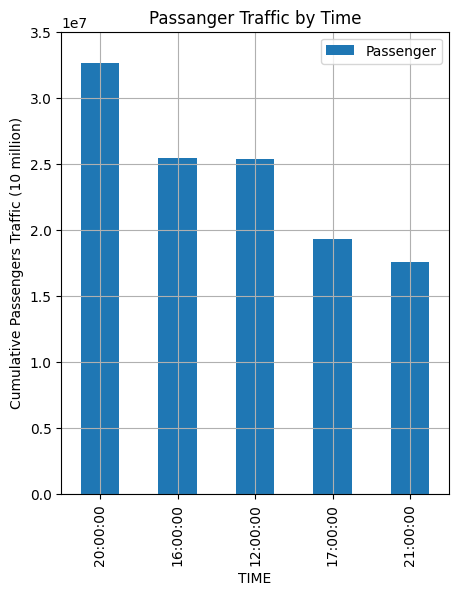

In [131]:
time[0:5].plot(kind="bar",
              x='TIME',y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (10 million)',
              grid=True,
              yticks=np.arange(0,40000000,5000000),
              title='Passanger Traffic by Time',
              figsize=(5,6))
plt.show()